# SVC Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
#Loading up the coffee data set
coffee_df = pd.read_csv('../data/coffee.csv')

#Creating a copy
coffee = coffee_df.copy()

Creating a train test split.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
## Make the split, stratify according to country of origin.
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            test_size=.2,
                                            stratify=coffee['Country_of_Origin'])

In [6]:
coffee_train.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
196,Mexico,Semi-washed / Semi-pulped,7.83,7.92,7.67,7.83,7.50,7.75,10.0,10.0,10.0,7.75,1450.0,1450.0,1450.0
465,Brazil,Pulped natural / honey,7.58,7.58,7.58,7.50,7.67,7.58,10.0,10.0,10.0,7.58,905.0,905.0,905.0
64,Brazil,Semi-washed / Semi-pulped,8.00,8.00,8.00,7.67,7.75,8.00,10.0,10.0,10.0,8.00,1250.0,1250.0,1250.0
27,Brazil,Natural / Dry,8.50,8.17,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00,1300.0,1300.0,1300.0
718,Mexico,Washed / Wet,7.58,7.58,7.42,7.42,7.42,7.42,10.0,10.0,10.0,7.42,1338.0,1338.0,1338.0


Creating a list of our predictor variables

In [7]:
predictors = ['Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup',
       'Sweetness', 'Cupper_Points']

coffee_train[predictors]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points
196,7.83,7.92,7.67,7.83,7.50,7.75,10.0,10.0,10.0,7.75
465,7.58,7.58,7.58,7.50,7.67,7.58,10.0,10.0,10.0,7.58
64,8.00,8.00,8.00,7.67,7.75,8.00,10.0,10.0,10.0,8.00
27,8.50,8.17,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00
718,7.58,7.58,7.42,7.42,7.42,7.42,10.0,10.0,10.0,7.42
...,...,...,...,...,...,...,...,...,...,...
836,7.33,7.42,7.33,7.67,7.42,7.25,10.0,10.0,10.0,7.33
877,7.08,7.33,7.58,7.58,7.17,7.50,10.0,10.0,10.0,7.33
431,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50
845,7.58,7.50,7.25,7.25,7.50,7.25,10.0,10.0,10.0,7.33


In [8]:
coffee.Country_of_Origin.value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Nicaragua                        26
Uganda                           26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
Name: Country_of_Origin, dtype: int64

In [9]:
labels = coffee.Country_of_Origin.value_counts().index

## Creating the Model

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [11]:
kfold = StratifiedKFold(5, random_state=47, shuffle=True)

svc_acc = np.zeros(5)

i = 0
for train_index, test_index in kfold.split(coffee_train[predictors], coffee_train.Country_of_Origin):
    X_tt = coffee_train[predictors].iloc[train_index,:]
    y_tt = coffee_train.Country_of_Origin.iloc[train_index]
    X_ho = coffee_train[predictors].iloc[test_index,:]
    y_ho = coffee_train.Country_of_Origin.iloc[test_index]
    
    pipe = Pipeline([('scale', StandardScaler()),('svc', SVC(kernel='rbf'))])
    
    pipe.fit(X_tt.values, y_tt)
    
    pred = pipe.predict(X_ho.values)
    
    conf_mat = confusion_matrix(y_ho, pred, labels= labels)
    svc_acc[i] = accuracy_score(y_ho, pred)
    
    i = i + 1

In [12]:
print(svc_acc)
print()
print("The AVG. CV. Accuracy is", np.round(np.mean(svc_acc),4))

[0.31840796 0.35820896 0.35323383 0.355      0.345     ]

The AVG. CV. Accuracy is 0.346


These accuracy scores are not ideal.  What does one of the confusion matrices look like for this method?

In [13]:
pd.DataFrame(conf_mat,
                 columns = [ 'Predicted '+labels[0], 'Predicted '+labels[1], 'Predicted '+labels[2], 'Predicted '+labels[3],
                            'Predicted '+labels[4], 'Predicted '+labels[5], 'Predicted '+labels[6], 'Predicted '+labels[7],
                            'Predicted '+labels[8], 'Predicted '+labels[9], 'Predicted '+labels[10], 'Predicted '+labels[11],
                            'Predicted '+labels[12], 'Predicted '+labels[13], 'Predicted '+labels[14], 'Predicted '+labels[15],
                            'Predicted '+labels[16], 'Predicted '+labels[17], 'Predicted '+labels[18]],
                 index = ['Actual '+labels[0], 'Actual '+labels[1], 'Actual '+labels[2], 'Actual '+labels[3],
                            'Actual '+labels[4], 'Actual '+labels[5], 'Actual '+labels[6], 'Actual '+labels[7],
                            'Actual '+labels[8], 'Actual '+labels[9], 'Actual '+labels[10], 'Actual '+labels[11],
                            'Actual '+labels[12], 'Actual '+labels[13], 'Actual '+labels[14], 'Actual '+labels[15],
                            'Actual '+labels[16], 'Actual '+labels[17], 'Actual '+labels[18]])

,Predicted Mexico,Predicted Colombia,Predicted Guatemala,Predicted Brazil,Predicted Taiwan,Predicted United States (Hawaii),Predicted Honduras,Predicted Costa Rica,Predicted Ethiopia,"Predicted Tanzania, United Republic Of",Predicted Thailand,Predicted Nicaragua,Predicted Uganda,Predicted Kenya,Predicted El Salvador,Predicted Indonesia,Predicted China,Predicted Malawi,Predicted Peru
Actual Mexico,28,4,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual Colombia,4,20,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Actual Guatemala,8,6,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Actual Brazil,7,5,2,3,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0
Actual Taiwan,5,2,1,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Actual United States (Hawaii),5,2,2,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
Actual Honduras,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual Costa Rica,1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual Ethiopia,0,4,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
"Actual Tanzania, United Republic Of",1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


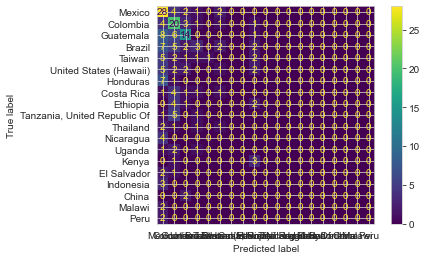

In [21]:
## testing confusion matrix plot as png for README
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_mat, display_labels = labels)
disp.plot()
plt.show()

## this doesn't look good, so instead will save the raw data frame

In [23]:
conf_mat[:7, :7]

array([[28,  4,  2,  1,  0,  2,  0],
       [ 4, 20,  3,  1,  0,  1,  0],
       [ 8,  6, 14,  0,  0,  0,  0],
       [ 7,  5,  2,  3,  0,  2,  0],
       [ 5,  2,  1,  1,  1,  0,  0],
       [ 5,  2,  2,  0,  0,  1,  0],
       [ 7,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [26]:
## saving smaller confusion matrix with first 8 entries as png for README
import dataframe_image as dfi
confusion_matrix_png = pd.DataFrame(conf_mat[:8, :8],
                 columns = [ 'Predicted '+labels[0], 'Predicted '+labels[1], 'Predicted '+labels[2], 'Predicted '+labels[3],
                            'Predicted '+labels[4], 'Predicted '+labels[5], 'Predicted '+labels[6], 'Predicted '+labels[7]],
                 index = ['Actual '+labels[0], 'Actual '+labels[1], 'Actual '+labels[2], 'Actual '+labels[3],
                            'Actual '+labels[4], 'Actual '+labels[5], 'Actual '+labels[6], 'Actual '+labels[7]])

dfi.export(confusion_matrix_png, 'confusion_matrix_SVC.png')

We are getting most of the data points to be predicted as Columbia or Mexico.

## Adding PCA to the model.

In [33]:
from sklearn.decomposition import PCA

In [34]:
fracs = np.arange(.01, 1, .01)

pca_acc = np.zeros((5, len(fracs)))

i = 0
for train_index, test_index in kfold.split(coffee_train[predictors], coffee_train.Country_of_Origin):
    X_tt = coffee_train[predictors].iloc[train_index,:]
    y_tt = coffee_train.Country_of_Origin.iloc[train_index]
    X_ho = coffee_train[predictors].iloc[test_index,:]
    y_ho = coffee_train.Country_of_Origin.iloc[test_index]
    
    j = 0
    for frac in fracs:
        svc_pipe = Pipeline([('scale', StandardScaler()),
                             ('pca', PCA(n_components=frac)),
                             ('svc', SVC(kernel='rbf'))])
        
        svc_pipe.fit(X_tt.values, y_tt)
        
        pred = svc_pipe.predict(X_ho.values)

        pca_acc[i,j] = accuracy_score(y_ho, pred)

        j = j + 1

    i = i + 1

In [35]:
print("Accuracy")
print("==============================")
print("The explained variance ratio with the highest avg. cv Accuracy was",
          fracs[np.argmax(np.mean(pca_acc, axis=0))])
print("This feature produced a model with avg. cv. Accuracy of",np.round(np.max(np.mean(pca_acc, axis=0)),4))

Accuracy
The explained variance ratio with the highest avg. cv Accuracy was 0.99
This feature produced a model with avg. cv. Accuracy of 0.346


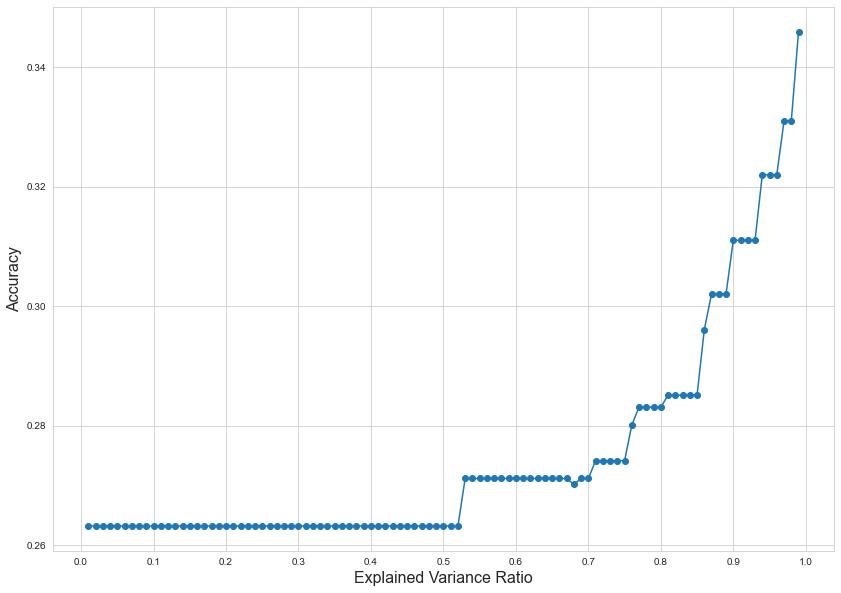

In [36]:
## Making the figure
plt.figure(figsize=(14,10))

## Precs
plt.plot(fracs, np.mean(pca_acc, axis=0), '-o')
plt.ylabel("Accuracy", fontsize=16)

plt.xlabel("Explained Variance Ratio", fontsize=16)
plt.xticks(np.arange(0,1.1,.1))

plt.show()

So PCA does not appear to help this method out.  